# Getting Started

### Import modules

In [1]:
from pyosrd.osrd import OSRD
from pyosrd.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

### Load a use case and add delays

In [3]:
# Load an OSRD use case
ref = OSRD(simulation='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[15:44:27,495] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:44:27,707] [INFO]              [FullInfra] parsing infra
[15:44:28,255] [INFO]              [FullInfra] adaptation to kotlin
[15:44:28,416] [INFO]              [FullInfra] loading signals
[15:44:28,451] [INFO]              [FullInfra] building blocks
[15:44:28,489] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[15:44:29,721] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[15:44:30,342] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[15:44:30,385] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:44:30,416] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [4]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

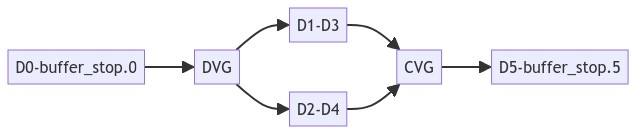

In [5]:
# Draw the infrastructure
delayed_schedule.draw_graph()

<Axes: xlabel='Time'>

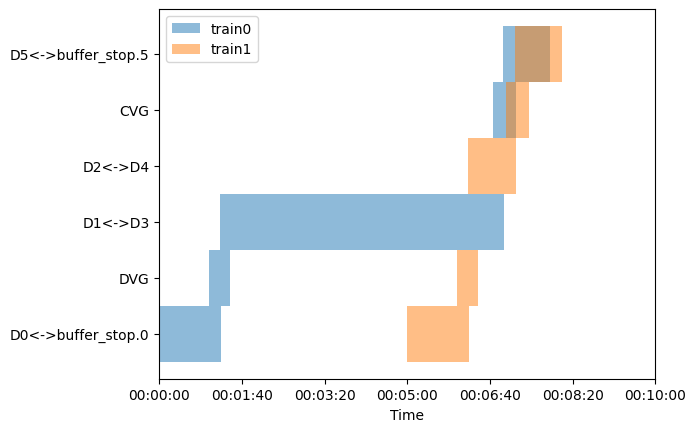

In [6]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [7]:
ortools_regulated = ref.regulate(agent=OrtoolsAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

/home/simon/dev/python/cpagent/src/rlway_cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/rlway_cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/rlway_cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and 

[15:44:43,283] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:44:43,505] [INFO]              [FullInfra] parsing infra
[15:44:44,001] [INFO]              [FullInfra] adaptation to kotlin
[15:44:44,186] [INFO]              [FullInfra] loading signals
[15:44:44,216] [INFO]              [FullInfra] building blocks
[15:44:44,242] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[15:44:45,280] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[15:44:45,835] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[15:44:45,873] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:44:45,873] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


<Axes: xlabel='Time'>

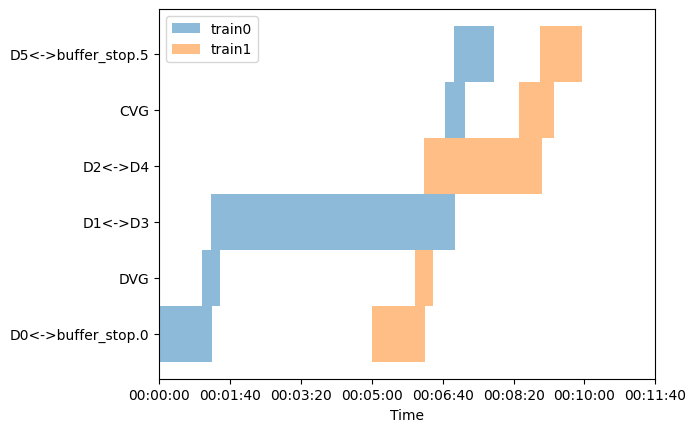

In [8]:
# Plot the space/time graph
ortools_regulated_schedule.plot()

### 